In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def read_data(api_name):
    columns = ['IP', 'Time', 'RPM', 'DateTime']

    folder = Path(f'./ds/{api_name}')
    assert os.path.isdir(folder), f"folder {folder} doesn't exist"
    files = [f for f in folder.glob('**/*.csv')]
    assert len(files) > 0, f"folder {folder} is empty"

    # full_df = pd.DataFrame(columns=columns,dtype={columns[0]: str, columns[1]: datetime, columns[2]: int32})
    full_df = pd.DataFrame(columns=columns)
    for f in files:
        dt = f.name.split('.')[0]
        df = pd.read_csv(f.as_posix(), skiprows = 1, header=None, names=columns, thousands=',')

        df['DateTime']= pd.to_datetime(f'{dt} '  + df['Time'])
        # convert
        # if pd.api.types.is_string_dtype(df['RPM']):
        #     df['RPM']=df['RPM'].str.replace(',','')
        # or
        # df['RPM'] = df['RPM'].replace({',': ''}, regex=True).map(pd.eval).astype(int)

        full_df = pd.concat([full_df, df], ignore_index=True)

    # convert data type
    full_df.RPM = full_df.RPM.astype(np.int32)

    return full_df[full_df.RPM >0]

def get_max_count(df):
    max_idx = df['RPM'].argmax()
    return df.iloc[max_idx]

def get_stats(df, title):
    desc = df.describe()
    p85 =  df.quantile(0.85, numeric_only=True)
    p85.name = '85%'
    p90 =  df.quantile(0.9, numeric_only=True)
    p90.name = '90%'
    p95 =  df.quantile(0.95, numeric_only=True)
    p95.name = '95%'
    print(pd.concat([desc.transpose(), p85, p90, p95], axis=1))

    sns.set(style="white", rc={'figure.figsize':(10,8)})
    sns.displot(df, x='RPM')
    plt.grid(color='gray',linestyle='-.',linewidth=0.25)
    plt.title(title)
    plt.xlabel('RPM per IP')
    

IP                  1.25.121.35
Time                      23:39
RPM                          55
DateTime    2022-10-29 23:39:00
Name: 41808, dtype: object


       count      mean       std  min  25%  50%  75%   max  85%  90%   95%
RPM  24854.0  2.917398  3.477233  1.0  1.0  2.0  3.0  55.0  5.0  7.0  10.0


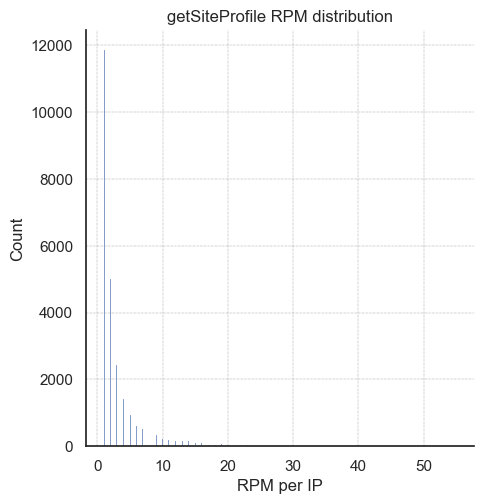

In [85]:
api='get-site-profile'
title='getSiteProfile RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP                116.204.97.12
Time                      21:12
RPM                         312
DateTime    2022-10-29 21:12:00
Name: 46078, dtype: object


                RPM
count  66251.000000
mean      46.660699
std       26.437367
min        1.000000
25%       32.000000
50%       35.000000
75%       57.000000
max      312.000000


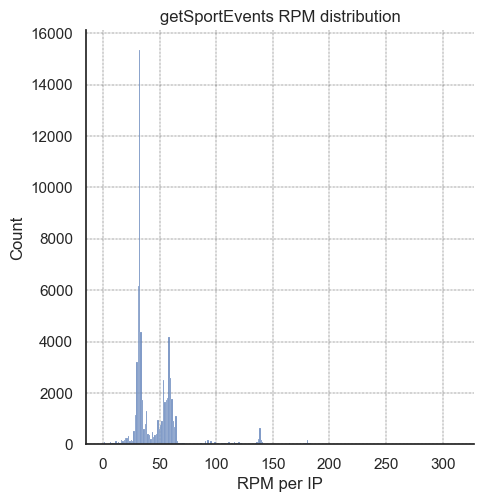

In [30]:
api='get-sport-events'
title='getSportEvents RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP               223.97.216.141
Time                      22:27
RPM                         156
DateTime    2022-10-21 22:27:00
Name: 13358, dtype: object


       count      mean       std  min  25%  50%   75%    max   85%   90%   95%
RPM  48459.0  9.450278  10.63788  1.0  2.0  4.0  17.0  156.0  17.0  20.0  32.0


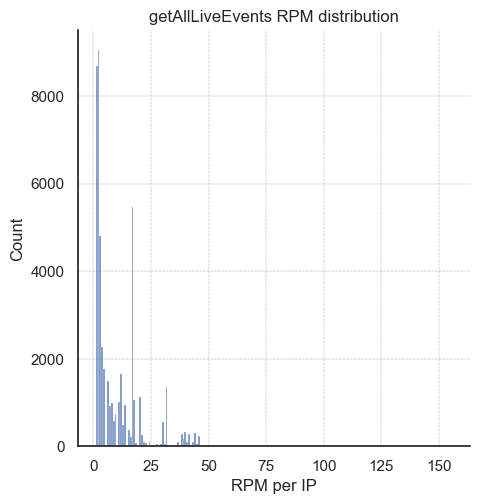

In [76]:
api='get-all-live-events'
title='getAllLiveEvents RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP               171.252.154.66
Time                      22:16
RPM                         699
DateTime    2022-10-28 22:16:00
Name: 52141, dtype: object


       count       mean        std  min  25%  50%   75%    max   85%   90%  \
RPM  51842.0  11.426122  27.224397  1.0  5.0  6.0  10.0  699.0  12.0  17.0   

      95%  
RPM  30.0  


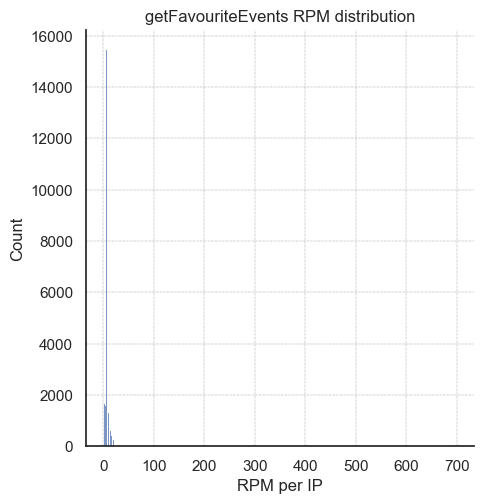

In [75]:
api='get-favourite-events'
title='getFavouriteEvents RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP               103.199.68.197
Time                      20:11
RPM                       12174
DateTime    2022-10-21 20:11:00
Name: 6410, dtype: object


       count        mean         std  min  25%  50%   75%      max   85%  \
RPM  10326.0  159.437149  699.460091  1.0  2.0  5.0  11.0  12174.0  23.0   

       90%    95%  
RPM  146.5  921.0  


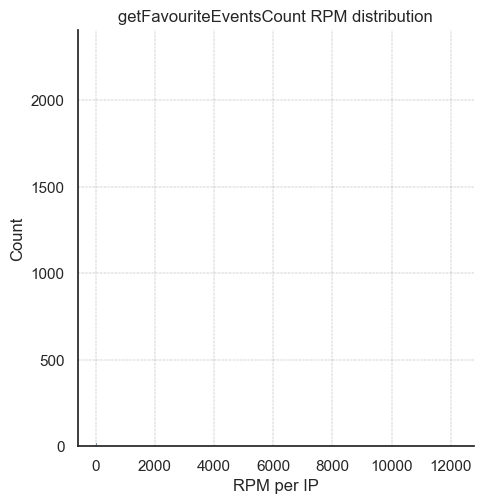

In [74]:
api='get-favourite-events-count'
title='getFavouriteEventsCount RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP                180.232.67.94
Time                      21:00
RPM                          66
DateTime    2022-10-29 21:00:00
Name: 37671, dtype: object


       count      mean      std  min  25%  50%  75%   max  85%  90%  95%
RPM  15221.0  2.177124  1.93767  1.0  1.0  2.0  3.0  66.0  4.0  4.0  5.0


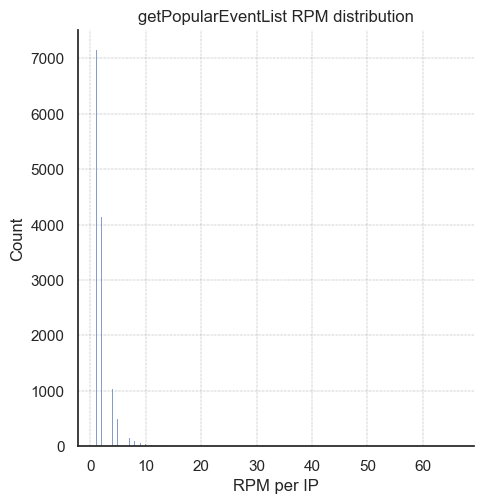

In [78]:
api='get-popular-eventlist'
title='getPopularEventList RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP              171.252.118.133
Time                      22:38
RPM                        2691
DateTime    2022-10-29 22:38:00
Name: 57654, dtype: object


       count       mean        std  min   25%   50%   75%     max   85%  \
RPM  69757.0  43.197055  49.409336  1.0  12.0  24.0  60.0  2691.0  86.0   

       90%    95%  
RPM  106.0  137.0  


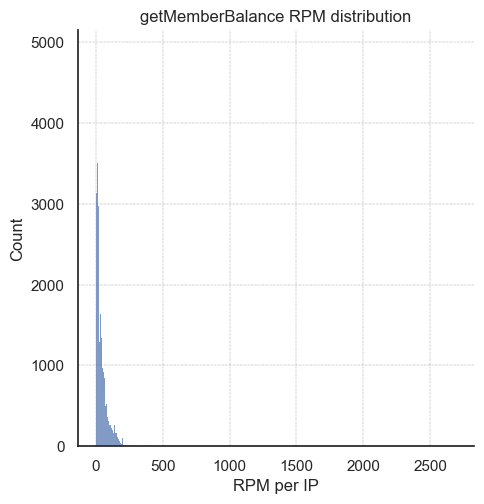

In [79]:
api='get-member-balance'
title='getMemberBalance RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP              222.216.164.157
Time                      21:09
RPM                         529
DateTime    2022-10-29 21:09:00
Name: 44912, dtype: object


       count       mean        std  min   25%   50%   75%    max    85%  \
RPM  58430.0  63.758857  60.945708  1.0  23.0  45.0  80.0  529.0  115.0   

       90%    95%  
RPM  142.0  190.0  


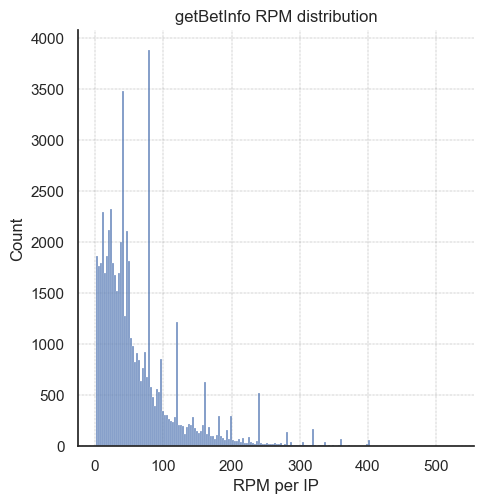

In [80]:
api='get-bet-info'
title='getBetInfo RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP                222.91.198.73
Time                      23:19
RPM                        3766
DateTime    2022-10-22 23:19:00
Name: 30538, dtype: object


       count      mean        std  min  25%  50%  75%     max  85%   90%   95%
RPM  43088.0  8.042587  47.423542  1.0  3.0  4.0  6.0  3766.0  9.0  11.0  18.0


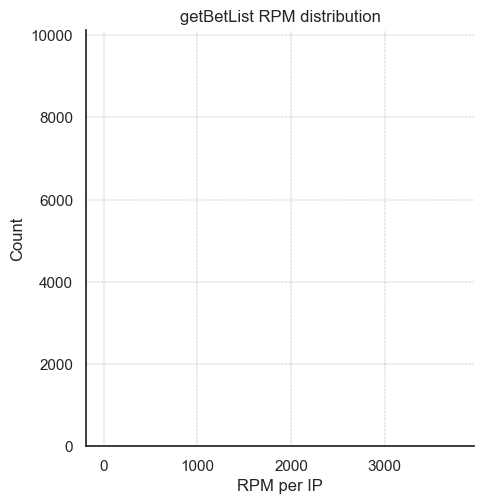

In [81]:
api='get-bet-list'
title='getBetList RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP                223.104.64.47
Time                      23:00
RPM                         168
DateTime    2022-10-28 23:00:00
Name: 47799, dtype: object


       count      mean       std  min  25%  50%  75%    max  85%  90%  95%
RPM  29741.0  3.080663  3.348195  1.0  2.0  3.0  4.0  168.0  4.0  5.0  7.0


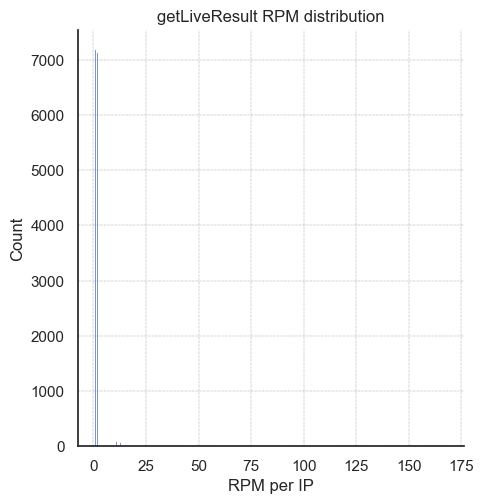

In [82]:
api='get-live-result'
title='getLiveResult RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

IP                  171.88.1.24
Time                      21:01
RPM                          26
DateTime    2022-10-22 21:01:00
Name: 26207, dtype: object


       count      mean       std  min  25%  50%  75%   max  85%  90%  95%
RPM  41262.0  2.079419  0.958643  1.0  2.0  2.0  2.0  26.0  2.0  2.0  4.0


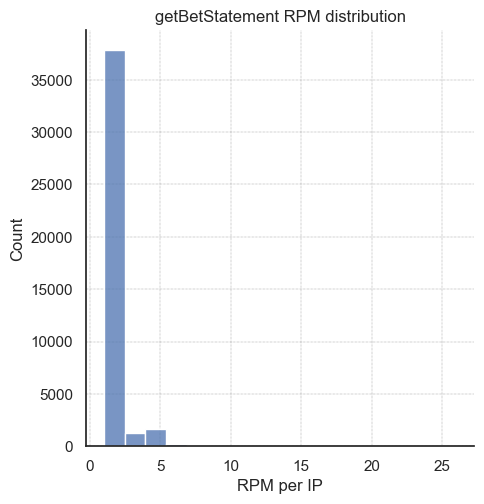

In [83]:
api='get-bet-statement'
title='getBetStatement RPM distribution'
df = read_data(api)
print(get_max_count(df))
print('\n')
get_stats(df, title)

In [ ]:
df = read_data('get-all')
print(get_max_count(df))
df[df.RPM >0].describe()

In [ ]:
grouped = df.groupby('Time')
# grouped.groups
df_time_group = grouped.sum()
df_time_group

In [ ]:
df_time_group.plot()

In [ ]:
grouped2 = df.groupby('DateTime')
df_datetime_group = grouped2.sum()

In [ ]:
df_datetime_group.RPM.describe()

In [ ]:
X = np.arange(start=0, stop=df_datetime_group.size)
Y = df_datetime_group['RPM']

plt.figure(figsize=(10,8))

# plt.plot(X,Y, c='b', alpha=.7)

T = np.arctan2(Y,X)
plt.scatter(x=X, y=Y, s=75, c=T, alpha=.5, cmap="rainbow")